## Notebook

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Data file
filename = 'vax_cases_deaths.csv'

In [24]:
#Path to save figures
path = "figures/"

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [25]:
pop_min = 0
pop_max = 100000000000000

In [26]:
# THE PERIOD MUST BE SAME AS IN FILE 'Vax_cases_deaths.ipynb'
period_start = '01/01/2022'
period_end = '01/31/2022'

In [27]:
df_all = pd.read_csv(filename)

In [28]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]
    
filter_pop['Infections per 10k inhabitants'] = (filter_pop['Cases in given period'])*10000/filter_pop['Population']
filter_pop['Deaths per 10k inhabitants'] = (filter_pop['Deaths in given period'])*10000/filter_pop['Population']

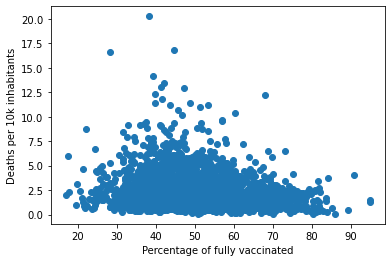

In [29]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
plt.scatter(filter_pop['Percentage of fully vaccinated'], filter_pop['Deaths per 10k inhabitants'])
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'fulvax_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

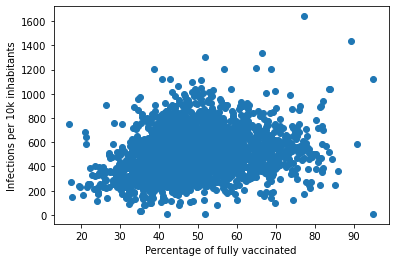

In [30]:
#Present the data of number of cases of infections with COVID19 against percentage of fully vaccinated
plt.scatter(filter_pop['Percentage of fully vaccinated'], filter_pop['Infections per 10k inhabitants'])
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'fulvax_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

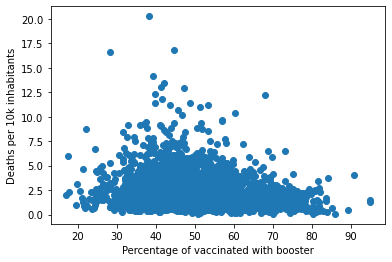

In [31]:
#Present the data of number of deaths caused by COVID19 against percentage of boosted
plt.scatter(filter_pop['Percentage of vaccinated with booster'], filter_pop['Deaths per 10k inhabitants'])
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'booster_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

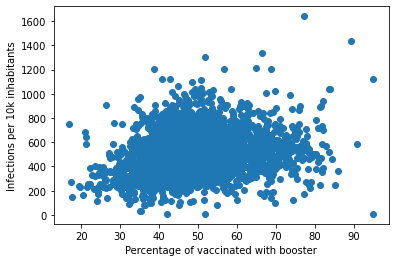

In [32]:
#Present the data of number of cases of infections with COVID19 against percentage of boosted
plt.scatter(filter_pop['Percentage of vaccinated with booster'], filter_pop['Infections per 10k inhabitants'])
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'booster_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

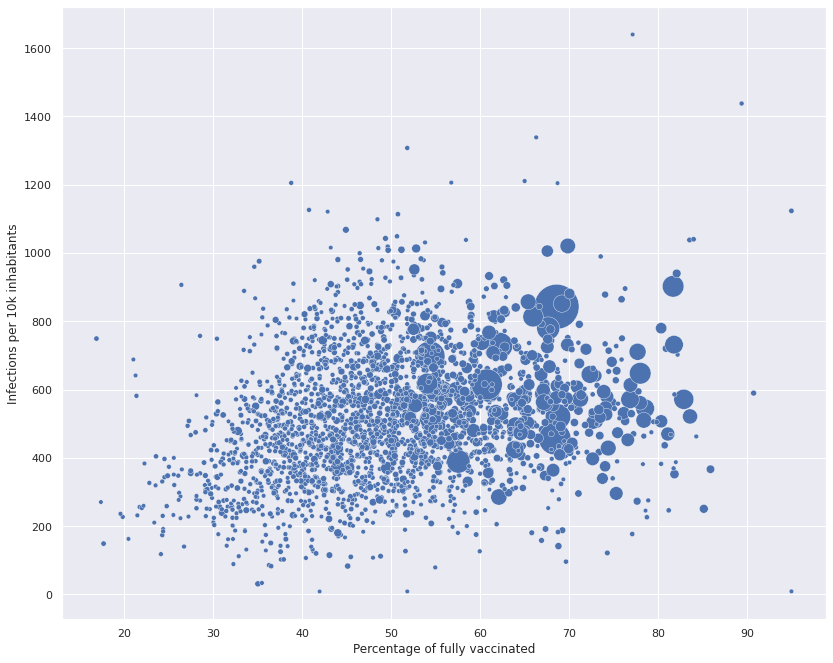

In [33]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", size="Population", legend=False, sizes=(20, 2000))
# show the graph
plt.show()

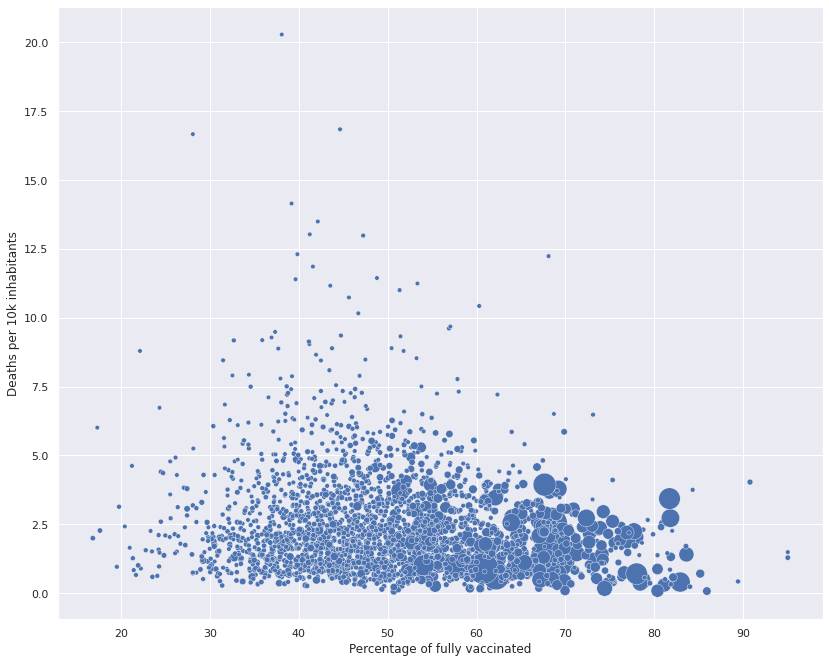

In [34]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", size="Population", legend=False, sizes=(20, 2000))
# show the graph
plt.show()